In [73]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [74]:
# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [75]:
x_train = x_train / 255.0
x_test = x_test / 255.0


Преобразование категориальных меток в one-hot encoding

In [76]:
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

In [77]:
# Добавление измерения для канала (т.к. у нас один канал изображения)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [78]:
# Определение архитектуры модели
model = keras.Sequential([
    keras.Input(shape=input_shape),
    Conv2D(32, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавляем Dropout слой
    Conv2D(64, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Dropout(0.25),  # Добавляем Dropout слой
    Conv2D(128, padding='same', kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [79]:
# Компиляция модели
model.compile(optimizer=RMSprop(),  # Заменяем оптимизатор на RMSprop
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [80]:
# Аугментация данных
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

In [81]:
# Обучение модели
# Добавили раннюю остановку (Early Stopping):
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(datagen.flow(x_train.reshape((-1, 28, 28, 1)), y_train_cat, batch_size=32),
                    epochs=15,
                    validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test_cat),
                    callbacks=[early_stopping])

Epoch 1/15
1875/1875 [==============================] - 87s 46ms/step - loss: 0.7471 - accuracy: 0.7315 - val_loss: 0.4404 - val_accuracy: 0.8440
Epoch 2/15
1875/1875 [==============================] - 92s 49ms/step - loss: 0.5318 - accuracy: 0.8069 - val_loss: 0.3888 - val_accuracy: 0.8611
Epoch 3/15
1875/1875 [==============================] - 88s 47ms/step - loss: 0.4852 - accuracy: 0.8268 - val_loss: 0.4526 - val_accuracy: 0.8234
Epoch 4/15
1875/1875 [==============================] - 87s 47ms/step - loss: 0.4517 - accuracy: 0.8365 - val_loss: 0.3559 - val_accuracy: 0.8690
Epoch 5/15
1875/1875 [==============================] - 86s 46ms/step - loss: 0.4305 - accuracy: 0.8446 - val_loss: 0.3406 - val_accuracy: 0.8787
Epoch 6/15
1875/1875 [==============================] - 90s 48ms/step - loss: 0.4226 - accuracy: 0.8493 - val_loss: 0.4112 - val_accuracy: 0.8458
Epoch 7/15
1875/1875 [==============================] - 83s 44ms/step - loss: 0.4147 - accuracy: 0.8528 - val_loss: 0.3121 -

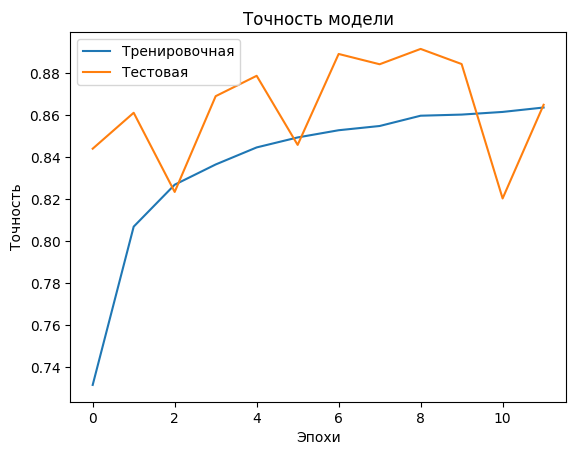

In [82]:
# Построение графиков точности и потерь
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

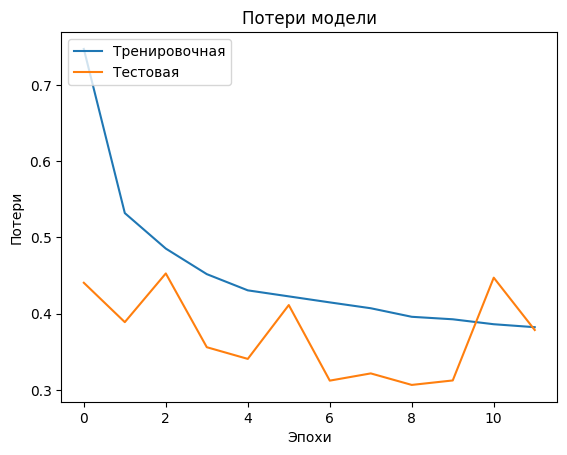

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('Эпохи')
plt.legend(['Тренировочная', 'Тестовая'], loc='upper left')
plt.show()

In [84]:
# Вывод информации о модели
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 14, 14, 64)      

Что мы сделали:
1. Увеличили количество эпох до 15.
2. Добавили Dropout.
3. Добавили Early Stopping.
4. Заменили оптимизатор Adam на RMSprop.
5. Добавили аугментацию данных.


Вывод: 
Несмотря на увеличение точности на тренировочном наборе данных, модель начала показывать признаки переобучения после 9 эпохи,  и использование метода ранней остановки (Early Stopping) позволило остановить обучение модели, когда ошибка на валидационном наборе данных перестала уменьшаться. В целом, проведенные изменения привели к улучшению производительности модели и сделали ее более устойчивой к переобучению.